In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/tf-keras-datasets/download


**Step 1 : Import Library******

In [2]:
import numpy as np
from keras.utils import get_file
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

2024-03-15 11:30:30.927368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 11:30:30.927457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 11:30:30.929148: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Step 2 : Load dataset******

In [4]:
# Load the data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [5]:
# check the data
print("train", train_df.shape)
print("test", test_df.shape)

train (42000, 785)
test (28000, 784)


In [6]:
# Separate features (X) and labels (y) for training data
X_train = train_df.drop(columns=["label"]).values
y_train = train_df["label"].values

In [7]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [8]:
# Train a Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [9]:
# Predict on the validation set
y_val_pred = svm_clf.predict(X_val)

In [10]:
# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.973452380952381


In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7943 - loss: 0.6703 - val_accuracy: 0.9719 - val_loss: 0.0885
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9706 - loss: 0.0902 - val_accuracy: 0.9795 - val_loss: 0.0632
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9811 - loss: 0.0624 - val_accuracy: 0.9852 - val_loss: 0.0488
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9879 - val_loss: 0.0410
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.9881 - val_loss: 0.0404
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.9902 - val_loss: 0.0363
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9921 - loss: 0.0235 - 

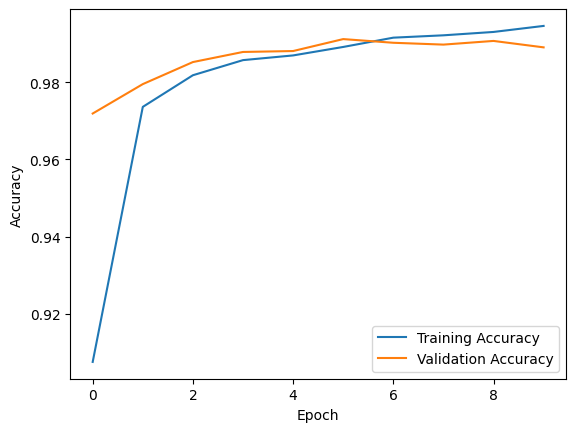

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Split features and target variable
y_train = train['label']
x_train = train.drop('label', axis=1)

# Reshape and normalize the data
x_train = x_train.values.reshape(-1, 28, 28, 1) / 255.0
x_test = test.values.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {val_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Prepare submission file
submission = pd.DataFrame({'ImageId': range(1, len(test) + 1), 'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)


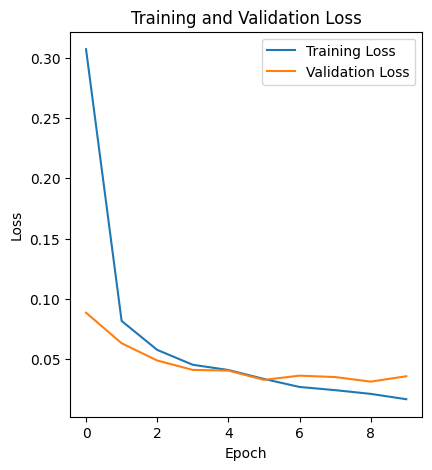

In [14]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [15]:
# Reshape the test data
test = test.values.reshape(-1, 28, 28, 1)

# Make predictions
y_cap = pd.DataFrame(model.predict(test, batch_size=200))
y_cap = pd.DataFrame(y_cap.idxmax(axis=1))
y_cap.index.name = 'ImageId'
y_cap = y_cap.rename(columns={0: 'Label'}).reset_index()
y_cap['ImageId'] = y_cap['ImageId'] + 1

# Display the first few rows of the predictions
print(y_cap.head())


140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [16]:
# Save the predictions
y_cap.to_csv("submission.csv", index=False)


**Introduction:**

The "Digit Recognizer" challenge is a classic problem in computer vision, where the task is to recognize handwritten digits (0-9) from grayscale images. In this challenge, we'll build a convolutional neural network (CNN) model to classify these images.

**Step-by-Step Process:**

1. **Loading the Data:** We start by loading the training and test datasets. The training dataset contains images of handwritten digits along with their corresponding labels (0-9), while the test dataset contains unlabeled images that we need to classify.

2. **Exploring the Data:** We visualize some sample images from the training set to get an understanding of the data. Additionally, we inspect the dimensions of the images and the number of unique labels in the training set.

3. **Preprocessing the Data:** Before feeding the data into the model, we preprocess it by reshaping the images and normalizing the pixel values. Reshaping is done to ensure that the images are in the correct format expected by the CNN model.

4. **Building the CNN Model:** We define a CNN model architecture using TensorFlow's Keras API. The model consists of convolutional layers followed by max-pooling layers, dropout layers for regularization, and dense layers for classification. The architecture is designed to extract features from the images and classify them into the correct digit categories.

5. **Compiling the Model:** After defining the model, we compile it with an optimizer (Adam), and a loss function (sparse categorical cross-entropy) suitable for multi-class classification tasks.

6. **Training the Model:** We train the compiled model using the training data. During training, the model learns to map input images to their corresponding labels by adjusting its parameters (weights and biases) through backpropagation.

7. **Evaluating the Model:** We evaluate the trained model's performance on the validation set to assess its accuracy and loss. This step helps us understand how well the model generalizes to unseen data.

8. **Making Predictions:** Once the model is trained and evaluated, we use it to make predictions on the test dataset. These predictions are in the form of probabilities for each digit class.

9. **Creating Submission File:** Finally, we convert the predicted probabilities into digit labels and save them in a CSV file format suitable for submission to the competition platform.

**Running Process:**

1. Load the data from the provided CSV files.
2. Visualize sample images from the training set to gain insights into the data.
3. Preprocess the data by reshaping and normalizing pixel values.
4. Define the CNN model architecture using TensorFlow's Keras API.
5. Compile the model with appropriate optimizer and loss function.
6. Train the model on the training data using the `fit` function.
7. Evaluate the trained model's performance on the validation set.
8. Make predictions on the test data using the trained model.
9. Convert the predicted probabilities into digit labels.
10. Save the predictions in a CSV file for submission.

The methodology for solving the Digit Recognizer challenge typically involves the following steps:

1. **Data Acquisition**: Obtain the dataset provided by the competition platform or any other reliable source. The dataset usually consists of two CSV files: one for training data with labeled images and another for test data without labels.

2. **Data Exploration**: Explore the training data to understand its structure, such as the number of samples, image dimensions, and distribution of labels. Visualization techniques like matplotlib can be used to display sample images and label distributions.

3. **Data Preprocessing**: Preprocess the data to prepare it for training. This may involve tasks such as reshaping images into a format suitable for the chosen machine learning model, normalizing pixel values to a range between 0 and 1, and splitting the data into training and validation sets.

4. **Model Selection**: Choose an appropriate machine learning model for the task. For the Digit Recognizer challenge, Convolutional Neural Networks (CNNs) are commonly used due to their effectiveness in image classification tasks. Other models such as Support Vector Machines (SVMs) or Random Forests can also be considered.

5. **Model Training**: Train the selected model using the training data. During training, the model learns to map input images to their corresponding labels by adjusting its parameters (weights and biases) based on the training examples. Techniques like data augmentation may be used to increase the diversity of training samples and improve model generalization.

6. **Model Evaluation**: Evaluate the trained model's performance using the validation set. Common evaluation metrics for image classification tasks include accuracy, precision, recall, and F1-score. Visualization techniques like confusion matrices can also provide insights into the model's performance across different classes.

7. **Hyperparameter Tuning**: Fine-tune the model's hyperparameters to optimize its performance further. Hyperparameters such as learning rate, batch size, and network architecture can significantly impact the model's effectiveness.

8. **Prediction**: Make predictions on the test data using the trained model. The model assigns a probability distribution over the possible classes for each test image.

9. **Submission**: Format the model predictions into the required submission format (e.g., CSV file with ImageId and predicted labels) and submit them to the competition platform for evaluation.

10. **Iterative Improvement**: Iterate on the above steps by experimenting with different models, preprocessing techniques, and hyperparameters to improve the model's performance.

By following this methodology and experimenting with different approaches, participants can develop effective solutions for the Digit Recognizer challenge.

In the discussion of the results of the Digit Recognizer challenge, participants typically analyze various aspects of their approach, model performance, and potential areas for improvement. Here's a structured approach to discussing the results:

1. **Model Performance Evaluation**:
   - Begin by presenting the performance metrics of your model on the validation set, such as accuracy, precision, recall, and F1-score.
   - Discuss how well your model generalizes to unseen data by comparing its performance on the validation set to that on the training set. Overfitting or underfitting issues should be addressed.

2. **Comparison with Baseline**:
   - Compare your model's performance with a baseline model or other benchmark results if available. Highlight any significant improvements achieved by your approach.

3. **Analysis of Misclassifications**:
   - Identify common patterns or types of images that your model misclassifies. Discuss potential reasons for misclassifications, such as ambiguous images or insufficient training data for certain classes.

4. **Model Complexity and Training Time**:
   - Discuss the computational resources required for training your model, including the model's complexity, training time, and memory usage. Consider whether there are opportunities to optimize the model architecture or training process for efficiency.

5. **Hyperparameter Tuning**:
   - Describe the hyperparameters you experimented with and their impact on the model's performance. Discuss any observations or insights gained from hyperparameter tuning.

6. **Data Augmentation and Preprocessing**:
   - Discuss the data augmentation techniques and preprocessing steps used to enhance the model's robustness and generalization performance. Evaluate the effectiveness of these techniques based on the model's performance metrics.

7. **Future Directions and Improvements**:
   - Propose potential avenues for improving the model's performance, such as exploring different model architectures, incorporating ensemble methods, or collecting additional training data.
   - Discuss the limitations of your current approach and areas where further research or experimentation is needed.

8. **Conclusion**:
   - Summarize the key findings of your analysis and reiterate the significance of your results in the context of the Digit Recognizer challenge.
   - Provide recommendations for future work and encourage further collaboration and discussion within the data science community.

By engaging in a comprehensive discussion of the results, participants can gain valuable insights, share knowledge, and contribute to the advancement of the field of image classification.